# Comparaison de différentes méthodes de machine learning sur 3 jeux de données différents. 

Thomas Renne

Code pour les jeux de données accéssible sur [GitHub][https://github.com/RudolphDev/machine_learning]

In [1]:
import numpy as np
from tr_functions.general import GeneralModel
from tr_functions.gaussian import GaussianModel
from tr_functions.kppv import KppvModel
from tr_functions.parzen import ParzenModel
from tr_functions.linear import LinearSeparationModel
from tr_functions.bagging import BaggingModel

In [2]:
split_data_tp1_app = GeneralModel.open_file('data/data_tp1_app.txt')
split_data_tp1_dec = GeneralModel.open_file('data/data_tp1_dec.txt')

split_data_tp2_app = GeneralModel.open_file('data/data_tp2_app.txt')
split_data_tp2_dec = GeneralModel.open_file('data/data_tp2_dec.txt')

split_data_tp3_app = GeneralModel.open_file('data/data_tp3_app.txt')
split_data_tp3_dec = GeneralModel.open_file('data/data_tp3_dec.txt')

# Analyse visuelle
### Dataset 1

In [3]:
# general = GeneralModel()
# general.train_data = split_data_tp1_app
# general.test_data = split_data_tp1_dec
# general.plot_all_data()

On remarque que les jeux de données d'apprentissage (croix plus claires) et de test (points sombres) se superposent relativement bien a l'exception de quelques outliers dans chaque classe. Normalement les différents modèles devraient séparer les classes avec une bon niveau de confiance. Dans cet exemple, la séparation des classes peut se faire manuellement. 

### Dataset 2

In [4]:
# general = GeneralModel()
# general.train_data = split_data_tp2_app
# general.test_data = split_data_tp2_dec
# general.plot_all_data()

Contrairement au premier jeu de données, les classes semblent plus diffusent que ce soit pour les jeux d'apprentissage et de test. En revanche on remarque que les classes sont constante entre les deux jeux de données. Les résultats des différents modèles seront moins bon que pour le premier jeu. La séparation des classes peut se faire manuellement avec quelques difficultés.

### Dataset 3

In [5]:
# general = GeneralModel()
# general.train_data = split_data_tp3_app
# general.test_data = split_data_tp3_dec
# general.plot_all_data()

Ce troisième jeu de données est totalement mélangé. Visuellement on ne peut pas distinguer de classes. En revanche comme pour les deux précédents jeux on remarque les classes d'apprentissage et de tests se supperposent bien. Dans ce cas précis une analyse manuelle est impossible. Il est probable que ce jeu de données donne les moins bon résultats pour les différents modèles. 

# Estimation gaussienne (euclidienne)

### Dataset 1

In [6]:
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp1_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "euclidian"
# gaussian_model.test_model(split_data_tp1_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()


L'analyse du jeu de données d'apprentissage avec la position de chaque classe représenté en par les croix noires montre une répartition bien visible. L'analyse du jeux de test montre un taux de Top 1 de 99,2% et de Top 2 de 100%. On peut donc en déduire que la méthode de l'estimation gaussienne avec distance euclidienne prédit de manière efficace les classes. Sur les 500 classes à prédire 496 sont bien classés.
Le deuxième graphique représente le jeu de données tests avec les classes en croix noires. Les couleurs des points représentent les classes prédites et les contours représentent les classes théoriques. On remarque que les 4 classes mal placées sont des classes qui peuvent être considéré comme des outliers, car posisitionné entre deux groupes de classes. 

### Dataset 2

In [7]:
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp2_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "euclidian"
# gaussian_model.test_model(split_data_tp2_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()

Comme précédement on remarque que les centres de classes sont bien positionnés par rapport aux classes. Comparé au précédent dataset les résultats sont un peu moins bon avec seulement 94% en Top 1. Lorsque l'on regarde la matrice de confusion on remarque que la classe numéro 3 est la classe la moins bien classée. En analysant le graphique on remarque la classe 3 (verte) a de nombreux points proche des centres de classes 5 et 2. De plus on remarque que les 6 points mal classés de la classe 4 sont placé dans la classe 3. La méthode est donc un peu moins bonne lorsque les données se chevauchent.  

### Dataset 3

In [8]:
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp3_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "euclidian"
# gaussian_model.test_model(split_data_tp3_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()

Pour le dataset 3 on remarque que les différentes classes sont mélangé car les plages de valeurs sont plus larges. Le résultat en Top 1 est de seulement 73%, et le Top 2 ne monte qu'à 89% soit moins que les deux autres datasets. Lorsque l'on étudie la matrice de confusion, on remarque que la classe la moins bien classé avec seulement 43% de bon est la classe 1. En comparant avec le graphique on remarque que la classe 1 est au centre des quatre autres. Donc ces points ce mélange avec ces classes, comme on peut le voir dans la matrice. Les résultats des autres classes sont meilleurs car elles ont de nombreux points à l'extérieur des classes, donc sans ambiguité. 

## Distance de mahalanobis

In [9]:
# print("Dataset 1:")
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp1_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "mahalanobis"
# gaussian_model.test_model(split_data_tp1_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()

In [10]:
# print("Dataset 2:")
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp2_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "mahalanobis"
# gaussian_model.test_model(split_data_tp2_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()

In [11]:
# print("Dataset 3:")
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp3_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "mahalanobis"
# gaussian_model.test_model(split_data_tp3_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()

La deuxième analyse réalisée sur les 3 datasets avec l'utilisation de la distance de Mahalanobis n'améliore pas les résultats de Top 1 et un tout petit peu ceux de Top 2 pour le dataset numéro 3. Donc utiliser une distance de Mahalanobis peu être recommandé pour des données moins bien discriminé. Et couplé avec une méthode de bagging. 

## Comparaison avec scikit learn


In [12]:
# from sklearn.mixture import GaussianMixture
# gm = GaussianMixture(n_components=2, random_state=0).fit(X)
# gm.predict([[0, 0], [12, 3]])


# K plus proches voisins

## Analyse à 1ppv

### Dataset 1

In [13]:
# kppv = KppvModel()
# kppv.k = 1
# kppv.vote_method = "unanimous"
# kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

L'analyse par kppv à 1 voisin, montre un bon taux de classement pour le premier jeu de données. En effet on remarque que le taux de bonne classification est de 99%. La matrice de confusion montre que 4 valeurs on été mal classées. Le graphique indique que ces 4 valeurs ont des positions ambigues entre deux classes. 

### Dataset 2

In [14]:
# kppv = KppvModel()
# kppv.k = 1
# kppv.vote_method = "unanimous"
# kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

Les résultats de classifications avec un 1 plus proche voisin montre un taux de bonne classification moins bon que celui du dataset 1 et aussi moins bon qu'avec la methode d'estimation gaussienne (92% de top 1 contre 94% avec l'estimation). Comme pour la précédente méthode, la classe la moins bien classé est la 3. Donc un plus proche voisin ne permet pas distinguer les points se trouvant plus vers d'autres classes, comme le montre le graphique de résultats de tests.

### Dataset 3

In [15]:
# kppv = KppvModel()
# kppv.k = 1
# kppv.vote_method = "unanimous"
# kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

La classification du troisième dataset avec un plus proche voisin est mauvaise. En effet seul 65% des points sont bien classés. Ce résultat est moins bon que celui de l'estimation gaussienne (73%). Comme pour cette méthode la classe la moins classé est la classe 1. Cette classe est centrale donc tout les points se mélangent en partie avec les autres. 

## kppv avec cross-validation

Nous allons maintenant essayer de trouver le meilleur K possible pour chaque dataset par cross-validation. Un fois ce k trouvé, on va l'utiliser avec le jeu de données de test. Et voir si un K > 1 améliore le taux de bonne classification. Pour cela nous allons comparer deux méthodes pour chaque jeux de données, un vote à la majorité et à l'unanimité.

### Dataset 1

In [16]:
# kppv = KppvModel()
# kppv.vote_method = "majority"
# kppv.get_k_cross_validation(split_data_tp1_app, 10, 5)
# kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

In [17]:
# kppv = KppvModel()
# kppv.vote_method = "unanimous"
# kppv.get_k_cross_validation(split_data_tp1_app, 10, 5)
# kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

Pour le premier jeu de données, chercher le meilleur K avec la cross-validation n'est pas nécéssaire. En effet, ce jeu de données est suffisament bien discriminé. Donc le meilleur k trouvé est 1. Sachant que pour k = 1, les votes à la majorité et à l'unanimité sont identiques on ne peut pas conclure sur le efficacité. On obtient donc les même résultats que précédement.

### Dataset 2

In [18]:
# kppv = KppvModel()
# kppv.vote_method = "majority"
# kppv.get_k_cross_validation(split_data_tp2_app, 50, 5)
# kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

In [19]:
# kppv = KppvModel()
# kppv.vote_method = "unanimous"
# kppv.get_k_cross_validation(split_data_tp2_app, 50, 5)
# kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

Pour l'analyse du deuxième jeu de données, on remarque une grosse disparité entre les votes à la majorité et à l'unanimité. Dans les deux cas, la cross-validation trouve une valeur de K optimal = **TODO**. Les K supérieur ont des taux d'erreur supérieur ce qui pourrait être dû au sur-apprentissage. Lorsque que l'on compare les résultats sur le jeu de test, on remarque que pour le vote à la majorité le taux de Top 1 a augmenté en passant de 92% à **TODO**%. En revanche pour le vote à l'unanimité, le taux de Top 1 est de seulement **TODO** avec un taux d'erreur de **TODO**. Ce taux Top 1 faible est dû aux cas ou il y a plusieurs classes possible trouvé. Le vote à l'unanimité ne peux pas gérer ces cas alors que celui à la majorité oui. L'étude des tableaux ou des graphs montre des résultats similaire entre les deux. En effet j'ai décidé de remplir les tableaux sans tenir compte des erreurs. Dans tous les cas le tableau est rempli avec la valeur majoritaire. La différence entre les tableaux est donc expliqué uniquement par la différence de K. Dans ce cas on remarque qu'un K **TODO** donne un meilleur résultats.

### Dataset 3

In [20]:
# kppv = KppvModel()
# kppv.vote_method = "majority"
# kppv.get_k_cross_validation(split_data_tp3_app, 50, 5)
# kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

In [21]:
# kppv = KppvModel()
# kppv.vote_method = "unanimous"
# kppv.get_k_cross_validation(split_data_tp3_app, 50, 5)
# kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

Pour ce dernier jeu de données, sont similaire à ceux du deuxième jeu de données. En effet, les valeurs de K trouvés par cross-validation sont similaire, comme précédement les taux Top 1 sont meilleurs pour le vote à la majorité. Et encore une fois lorsque l'on compare les résultats du tableau et du graphique on remarque qu'un K plus grand permet de meilleurs résultats donc ce n'est pas le sur-apprentissage qui explique l'augmentation du taux d'erreur lors de la cross-validation. 

La méthode de classification par Kppv ne semble pas plus performante que l'estimation gaussienne alors que le modèle est plus lent et plus complexe. 

## Comparaison avec scikit-learn

# Methode de Parzen
Comme précédement pour le kppv, la méthode de Parzen est un modèle paramétrique. Dans ce cas le paramètre est noté h et correspond à la largeur de la fonction uniforme ou à l'écart-type de la fonction gaussienne. Comme précédement, cet hyper-paramètre doit être trouvé. Nous allons donc utiliser la méthode de la cross-validation. En effet étudier le modèle avec un h aléatoire n'est pas pertinent. 
## Noyau uniforme
Pour le noyau uniforme j'ai décidé de tester tout les h possible entre 0,1 et 5 avec un pas de 0,1. J'ai décidé d'aller j'usqu'a 5 car cela représente environ la moitité de la taille des classes.
### Dataset 1

In [22]:
# parzen = ParzenModel()
# h_list = np.arange(0.1, 5, 0.1)
# parzen.method = "uniform"
# parzen.get_h_cross_validation(split_data_tp1_app, h_list, 5)
# parzen.compute_parzen(split_data_tp1_app, split_data_tp1_dec)
# parzen.print_model_result()
# parzen.plot_test_data()

L'analyse de l'hyperparamètre h montre que pour la méthode uniforme plus le h est important plus le taux d'erreur est faible avec un plateau atteint aux environ de 2. Finalement le taux de bonne classification est identiques aux autres modèles de classification. 
### Dataset 2

In [23]:
# parzen = ParzenModel()
# h_list = np.arange(0.1, 5, 0.1)
# parzen.method = "uniform"
# parzen.get_h_cross_validation(split_data_tp2_app, h_list, 5)
# parzen.compute_parzen(split_data_tp2_app, split_data_tp2_dec)
# parzen.print_model_result()
# parzen.plot_test_data()

Malgré un jeu de données plus complexe pour le jeu de données 2 on remarque un profil de taux d'erreur en fonction de H similaire avec un plateau commencant vers 2. Les résultats de classification top 1 semblent meilleurs que les autres modèles (95,8% contre environ 94,8% pour les autres modèles). Comme pour tout les modèles on remarque que la classe 3 est toujours la plus mal classé car se trouvant au centre des autres. 

### Dataset 3

In [24]:
# parzen = ParzenModel()
# h_list = np.arange(0.1, 5, 0.1)
# parzen.method = "uniform"
# parzen.get_h_cross_validation(split_data_tp3_app, h_list, 5)
# parzen.compute_parzen(split_data_tp3_app, split_data_tp3_dec)
# parzen.print_model_result()
# parzen.plot_test_data()

Comme pour les deux autres datasets, le taux d'erreur varie de la même façon en fonction du h. On obtient un plateau au environ de 2. Les résultats de Top 1 montre un taux d'erreur similaire aux autres modèles, pas d'amélioration. La classe est 1 est très mal classé, ce qui s'explique par la position de cette classe. lorsque l'on regarde les données on remarque que les points se mélangent avec les autres classes. Le graphique montre en revanche des points mal classé de façon totalement illogique, tel que les points rouges en bas qui sont trouvé en bleu. 
## Noyau Gaussien
Nous allons maintenant étudier la méthode de Parzen avec un noyau gaussien. Contrairement au noyau uniforme, les résultats sont plus quantitatif et non binaire. Ceci va normalement permettre d'afiner le modèle. Nous allons encore une fois utiliser un hyperparamètre h. Le h correspond cette fois ci à l'écart type de la gaussienne utilisé. Comme précédement nous allons estimer le h par cross-validation.
### Dataset 1

In [25]:
# parzen = ParzenModel()
# h_list = np.arange(0.1, 5, 0.1)
# parzen.method = "gaussian"
# parzen.get_h_cross_validation(split_data_tp1_app, h_list, 5)
# parzen.compute_parzen(split_data_tp1_app, split_data_tp1_dec)
# parzen.print_model_result()
# parzen.plot_test_data()



### Dataset 2

In [26]:
# parzen = ParzenModel()
# h_list = np.arange(0.1, 5, 0.1)
# parzen.method = "gaussian"
# parzen.get_h_cross_validation(split_data_tp2_app, h_list, 5)
# parzen.compute_parzen(split_data_tp2_app, split_data_tp2_dec)
# parzen.print_model_result()
# parzen.plot_test_data()

### Dataset 3

In [27]:
# parzen = ParzenModel()
# h_list = np.arange(0.1, 5, 0.1)
# parzen.method = "gaussian"
# parzen.get_h_cross_validation(split_data_tp3_app, h_list, 5)
# parzen.compute_parzen(split_data_tp3_app, split_data_tp3_dec)
# parzen.print_model_result()
# parzen.plot_test_data()

## Comparaison avec scikit learn

# Séparation linéaire
## Comparaison un contre un
### Dataset 1

In [28]:
# linear = LinearSeparationModel()
# model = linear.linear_train(split_data_tp1_app, is_converging=True, one_vs_all=False) 
# linear.print_model()
# linear.test_linear_model(split_data_tp1_dec, model)
# linear.plot_linear_data()
# linear.print_model_result()
# linear.plot_test_data()

### Dataset 2

In [29]:
# linear = LinearSeparationModel()
# linear.epochs = 100
# model = linear.linear_train(split_data_tp2_app, is_converging=False, one_vs_all=False)
# linear.print_model()
# linear.test_linear_model(split_data_tp2_dec, model)
# linear.plot_linear_data()
# linear.print_model_result()
# linear.plot_test_data()

### Dataset 3

In [30]:
# linear = LinearSeparationModel()
# linear.epochs = 1000
# model = linear.linear_train(split_data_tp3_app, is_converging=False, one_vs_all=False)
# linear.print_model()
# linear.test_linear_model(split_data_tp3_dec, model)
# linear.plot_linear_data()
# linear.print_model_result()
# linear.plot_test_data()

## Comparaison un contre tous
Suppression des classes centrales. 

### Dataset 1
D'après la représentation graphique de l'analyse visuelle on remarque que la classe centrale est la classe 5

In [31]:
# clean_app_data = GeneralModel.remove_one_class_from_data(split_data_tp1_app, '5')
# clean_dec_data = GeneralModel.remove_one_class_from_data(split_data_tp1_dec, '5')
# linear = LinearSeparationModel()
# linear.epochs = 100
# model = linear.linear_train(clean_app_data, is_converging=False, one_vs_all=True)
# linear.print_model()
# linear.test_linear_model(clean_dec_data, model)
# linear.print_model_result()
# linear.plot_test_data()

In [32]:
# clean_app_data = GeneralModel.remove_one_class_from_data(split_data_tp2_app, '3')
# clean_dec_data = GeneralModel.remove_one_class_from_data(split_data_tp2_dec, '3')
# linear = LinearSeparationModel()
# linear.epochs = 1000
# model = linear.linear_train(clean_app_data, is_converging=False, one_vs_all=True)
# linear.print_model()
# linear.test_linear_model(clean_dec_data, model)
# linear.print_model_result()
# linear.plot_test_data()

In [33]:
# clean_app_data = GeneralModel.remove_one_class_from_data(split_data_tp3_app, '1')
# clean_dec_data = GeneralModel.remove_one_class_from_data(split_data_tp3_dec, '1')
# linear = LinearSeparationModel()
# linear.epochs = 1000
# model = linear.linear_train(clean_app_data, is_converging=False, one_vs_all=True)
# linear.print_model()
# linear.test_linear_model(clean_dec_data, model)
# linear.print_model_result()
# linear.plot_test_data()

## Bagging
### Dataset 1

Bagging Model created
Linear Seaparation Model created
Boostrap of linear model 1 on 3
Begin linear training
Training done
Boostrap of linear model 2 on 3
Begin linear training
Training done
Boostrap of linear model 3 on 3
Begin linear training
Training done
Bagging computing complete
Results :
----------------

Top results :
----------------
Top 1 rate :  0.99
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  98 │   0 │   0 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │ 100 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   1 │   0 │   0 │  98 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   0 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


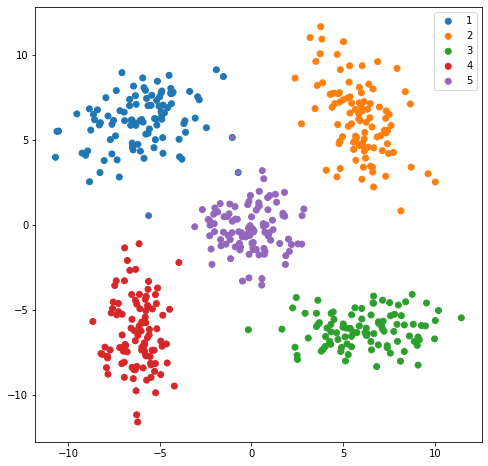

In [34]:
bagging = BaggingModel()
bagging.nb_models = 3
bagging.test_bagging_linear_model(split_data_tp1_app, split_data_tp1_dec)
bagging.compute_bagging_results()
bagging.print_model_result()
bagging.plot_test_data()

# Conclusion
||Dataset 1|Dataset 2|Dataset 3|
|----|-----|-----|-----|
|estimation gaussienne (euclidienne)| 99,2% | 94,6% | 72,8% |
|estimation gaussienne (euclidienne)| 99,2% | 94,6% | 72,8% |
|1ppv| 99,2% | 92% | 64,6% |
|kppv (unanimité)| 99,2% | 59% | 12,6% |
|kppv (majorité)| 99,6% | 94,6% | 68,6% |
|Parzen (uniform)| 99,2% | 95,2% | 70,4% |
|Parzen (gaussienne)| 99,6% | 94,4% | 69,2% |